In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import math

**Problem 1**

**Question 1**

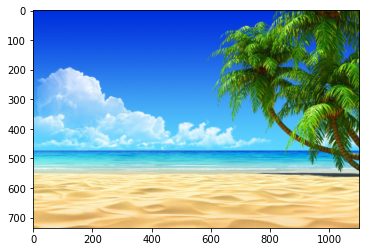

In [7]:
## This is the function to zoom a color image by nearest neighbour method by 1.5 times

def nearest_nbh(image):

    img = plt.imread(image)
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]
    
    out_shape = ((np.shape(img_r)[0]*1.5),((np.shape(img_r)[1]*1.5))) ## As 1.5 is the zoominf factor given in question

    out_img_r = np.zeros((int(out_shape[0]),int(out_shape[1]))).astype(int)

    for x in range(int(out_shape[0])):
        for y in range(int(out_shape[1])):
            out_x = round(x * (2/3))
            out_y = round(y * (2/3))
            
            if out_x > np.shape(img_r)[0]: 
                out_x = np.shape(img_r)[0] - 1
            if out_y > np.shape(img_r)[1]:
                out_y = np.shape(img_r)[1] - 1
                
            out_img_r[x][y] = img_r[out_x][out_y]
            
    out_shape = ((np.shape(img_g)[0]*1.5),((np.shape(img_g)[1]*1.5))) ## As 1.5 is the zoominf factor given in question

    out_img_g = np.zeros((int(out_shape[0]),int(out_shape[1]))).astype(int)

    for x in range(int(out_shape[0])):
        for y in range(int(out_shape[1])):
            out_x = round(x * (2/3))
            out_y = round(y * (2/3))
            
            if out_x > np.shape(img)[0]: 
                out_x = np.shape(img)[0] - 1
            if out_y > np.shape(img)[1]:
                out_y = np.shape(img)[1] - 1
                
            out_img_g[x][y] = img_g[out_x][out_y]
            
    out_shape = ((np.shape(img_b)[0]*1.5),((np.shape(img_b)[1]*1.5))) ## As 1.5 is the zoominf factor given in question

    out_img_b = np.zeros((int(out_shape[0]),int(out_shape[1]))).astype(int)

    for x in range(int(out_shape[0])):
        for y in range(int(out_shape[1])):
            out_x = round(x * (2/3))
            out_y = round(y * (2/3))
            
            if out_x > np.shape(img)[0]: 
                out_x = np.shape(img)[0] - 1
            if out_y > np.shape(img)[1]:
                out_y = np.shape(img)[1] - 1
                
            out_img_b[x][y] = img_b[out_x][out_y]
            
    out_img = np.zeros((int(out_shape[0]),int(out_shape[1]),3)).astype(int)
    
    for j in range(int(out_shape[0])):
        for k in range(int(out_shape[1])):
            out_img[j][k][0] =  int(out_img_r[j][k])
    for j in range(int(out_shape[0])):
        for k in range(int(out_shape[1])):
            out_img[j][k][1] =  int(out_img_g[j][k])
    for j in range(int(out_shape[0])):
        for k in range(int(out_shape[1])):
            out_img[j][k][2] =  int(out_img_b[j][k])

    return plt.imshow(out_img)
    
nearest_nbh("/content/drive/MyDrive/DIP_data/bg1.jpg")

**Question 2**

<ipython-input-12-67ae58495619>:28: RuntimeWarning: overflow encountered in ubyte_scalars
  out_img[x][y][0] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][0] + img[int((x+1)/1.5)][int((y+1)/1.5)][0])
<ipython-input-12-67ae58495619>:49: RuntimeWarning: overflow encountered in ubyte_scalars
  out_img[x][y][1] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][1] + img[int((x+1)/1.5)][int((y+1)/1.5)][1])
<ipython-input-12-67ae58495619>:69: RuntimeWarning: overflow encountered in ubyte_scalars
  out_img[x][y][2] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][2] + img[int((x+1)/1.5)][int((y+1)/1.5)][2])


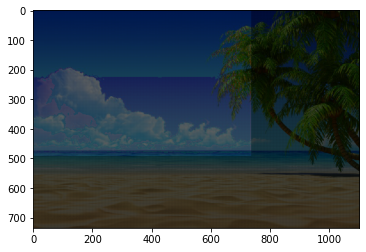

In [12]:
##This function is for bilinear zoom 

def bilinear_zoom(image):

  img = plt.imread(image)

  out_shape = ((np.shape(img)[0]*1.5),((np.shape(img)[1]*1.5))) ## As 1.5 is the zoominf factor given in question

  out_img = np.zeros((int(out_shape[0]),int(out_shape[1]),3)).astype(int)


  for x in range(int(out_shape[0])):
      for y in range(int(out_shape[1])):
          
          out_img[x][0][0] = img[int(x/1.5)][0][0]
          
  for x in range(1,int(out_shape[0]),2):
      for y in range(1,int(out_shape[1]),2):
          
          out_img[x][y][0] = img[int(x/1.5)][int(y/1.5)][0]
          
  for x in range(2,int(out_shape[0]),2):
      for y in range(2,int(out_shape[1]),2):
          if x > np.shape(img)[0]: 
              x = np.shape(img)[0] - 2
          if y > np.shape(img)[1]:
              y = np.shape(img)[1] - 2

          out_img[x][y][0] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][0] + img[int((x+1)/1.5)][int((y+1)/1.5)][0])
          
          
  for x in range(int(out_shape[0])):
      for y in range(int(out_shape[1])):
          
          out_img[x][0][1] = img[int(x/1.5)][0][1]
          
  for x in range(1,int(out_shape[0]),2):
      for y in range(1,int(out_shape[1]),2):
          
          out_img[x][y][1] = img[int(x/1.5)][int(y/1.5)][1]
          
  for x in range(2,int(out_shape[0]),2):
      for y in range(2,int(out_shape[1]),2):
          if x > np.shape(img)[0]: 
              x = np.shape(img)[0] - 1
          if y > np.shape(img)[1]:
              y = np.shape(img)[1] - 1
                  

          out_img[x][y][1] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][1] + img[int((x+1)/1.5)][int((y+1)/1.5)][1])
          
          
  for x in range(int(out_shape[0])):
      for y in range(int(out_shape[1])):
          
          out_img[x][0][2] = img[int(x/1.5)][0][2]
          
  for x in range(1,int(out_shape[0]),2):
      for y in range(1,int(out_shape[1]),2):
          
          out_img[x][y][2] = img[int(x/1.5)][int(y/1.5)][2]
          
  for x in range(2,int(out_shape[0]),2):
      for y in range(2,int(out_shape[1]),2):
          if x > np.shape(img)[0]: 
              x = np.shape(img)[0] - 1
          if y > np.shape(img)[1]:
              y = np.shape(img)[1] - 1

          out_img[x][y][2] = 1/2*(img[int((x-1)/1.5)][int((y-1)/1.5)][2] + img[int((x+1)/1.5)][int((y+1)/1.5)][2])
          
              
  return plt.imshow(out_img)
            
bilinear_zoom('/content/drive/MyDrive/DIP_data/bg1.jpg')

**Problem 2**

**Question 1**

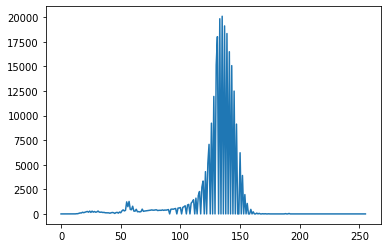

In [12]:
##Function to plot the histogram of a grayscale image
def hist_img(image):
     
    img = plt.imread(image) 
    h = [0] * 256
    a = np.arange(0,256,1)
    for x in range(np.shape(img)[0]):
        for y in range(np.shape(img)[1]):
            i = img[x,y]
            h[i] = h[i] + 1

    return plt.plot(a,h)

hist_img("/content/drive/MyDrive/DIP_data/7.1.08.tiff")

**Question 2**

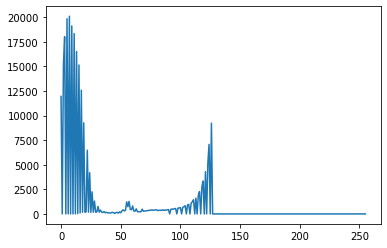

In [14]:
##This function is for the same histogram but with MSB set to zero

def hist_msb(image):
  I = plt.imread(image)
  lst = []
  new_lst = []
  h = [0] * 256
  a = np.arange(0,256,1)
  for i in range(np.shape(I)[0]):
      for j in range(np.shape(I)[1]):
          lst.append(np.binary_repr(I[i][j], width = 8))

  for i in range(len(lst)):
      element = lst[i]
      index = 0
      temp = list(element) 
      temp[index] = '0'
      element = "".join(temp)
      new_lst.append(int(element,2))

  for i in range(len(new_lst)):
      j = new_lst[i]
      h[j] = h[j] + 1

  return plt.plot(a,h)


hist_msb("/content/drive/MyDrive/DIP_data/7.1.08.tiff")

##Here the histogram is bimodal

**Problem 3**

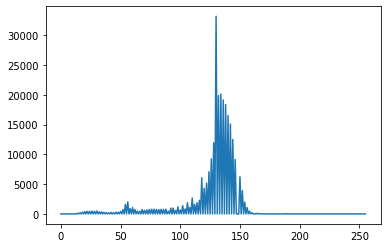

In [15]:
##This function is for the same original histogram but LSB set to zero

def hist_lsb(image):
  I = plt.imread(image)
  lst = []
  new_lst_2 = []
  h_2 = [0] * 256
  a = np.arange(0,256,1)
  for i in range(np.shape(I)[0]):
      for j in range(np.shape(I)[1]):
          lst.append(np.binary_repr(I[i][j], width = 8))
          
  for i in range(len(lst)):
      element = lst[i]
      index = 7
      temp = list(element) 
      temp[index] = '0'
      element = "".join(temp)
      new_lst_2.append(int(element,2))

  for i in range(len(new_lst_2)):
      j = new_lst_2[i]
      h_2[j] = h_2[j] + 1

  return plt.plot(a,h_2)

hist_lsb("/content/drive/MyDrive/DIP_data/7.1.08.tiff")

##Here the histogram is unimodal

**Question 4**

In [2]:
## As per definition the total number of bits are
Image_bits = 512*512*10
Baud_rate_1 = 56000

time_1 = Image_bits / Baud_rate_1

print("Time required to transfer {} secomds with 56K Baud rate".format(time_1))

Baud_rate_2 = 3000000

time_2 = Image_bits / Baud_rate_2

print("Time required to transfer {} secomds with 3000K Baud rate".format(time_2))

Time required to transfer 46.81142857142857 secomds with 56K Baud rate
Time required to transfer 0.8738133333333333 secomds with 3000K Baud rate


**Problem 3**

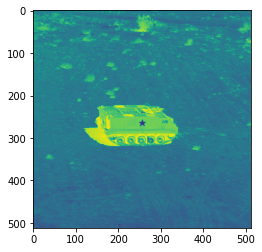

In [17]:
## This function is for generating the image negative of a given grayscale image
def img_neg(img):
    I = plt.imread(img)
    img_copy = I.copy()
    for i in range(np.shape(I)[0]):
        for j in range(np.shape(I)[1]):
            img_copy[i][j] = 255 - img_copy[i][j]
        
    return plt.imshow(img_copy)

img_neg("/content/drive/MyDrive/DIP_data/7.1.08.tiff")